In [ ]:
import pandas as pd

uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)

#Renomeando através da criação de um dicionário


In [ ]:
rename = {
     'unfinished' : 'nao_finalizado',
     'expected_hours' : 'tempo_estimado',
     'price' : 'preco'
}

dados = dados.rename(columns = rename)
dados.head()

,nao_finalizado,tempo_estimado,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


#Criação de uma coluna binária que é o oposto da outra através de um dicionário

In [ ]:
troca = {
    0 : 1, 
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
#nome_do_dataset['nome_da_nova_coluna'] = nome_do_dataset.coluna_desejada.map(novo_dicionario)

dados.tail()

,nao_finalizado,tempo_estimado,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


#Criação de um Gráfico com as Informações

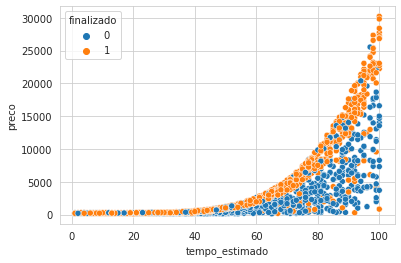

In [ ]:
import seaborn as sns

sns.scatterplot(x= 'tempo_estimado', y = 'preco', hue= 'finalizado', data = dados)
#x = eixo x , y = eixo y, hue = coluna que sera pintada, data = qual dataset servirá de base

#Criação de gráficos separados para cada informação
(Contraposição ao metodo acima)

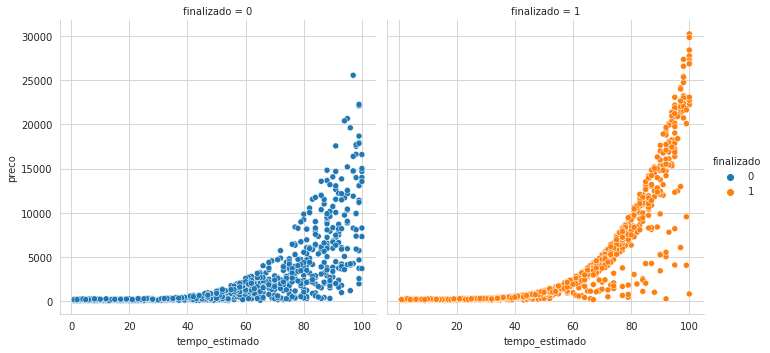

In [ ]:
sns.set_style('whitegrid')
sns.relplot(x = 'tempo_estimado', y = 'preco', col = 'finalizado', hue = 'finalizado', data = dados)

**Separação das colunas para atribuição dos treinos e testes **

In [ ]:
x = dados[['tempo_estimado', 'preco']]
y = dados['finalizado']


### Importação do modelo e separação de treino e testes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


**Criação da BaseLine para metricas**

In [ ]:
import numpy as np

base_line = np.ones(540)
acuracia = accuracy_score(teste_y, base_line)* 100

print("A acurácia de Base Line foi %.2f%%" % acuracia)

A acurácia de Base Line foi 52.59%


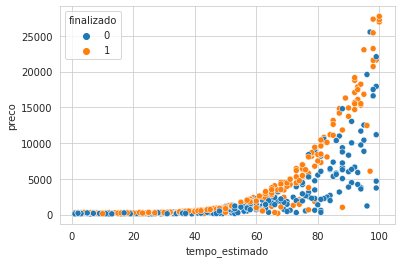

In [ ]:
sns.scatterplot(x="tempo_estimado", y="preco", hue=teste_y, data=teste_x) 

.Separando pontos máximos e mínimos de cada um dos eixos

In [ ]:
x_min = teste_x.tempo_estimado.min()
x_max = teste_x.tempo_estimado.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [ ]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [ ]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

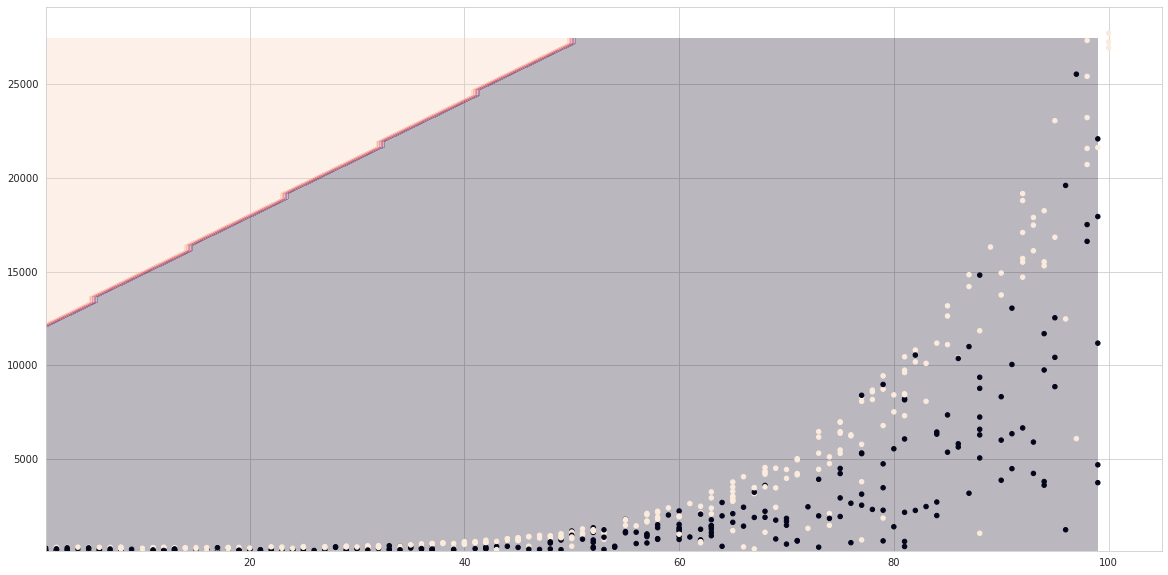

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize= (20, 10))
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.tempo_estimado,teste_x.preco, c = teste_y , s =20)
# DECISION BOUNDARY

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


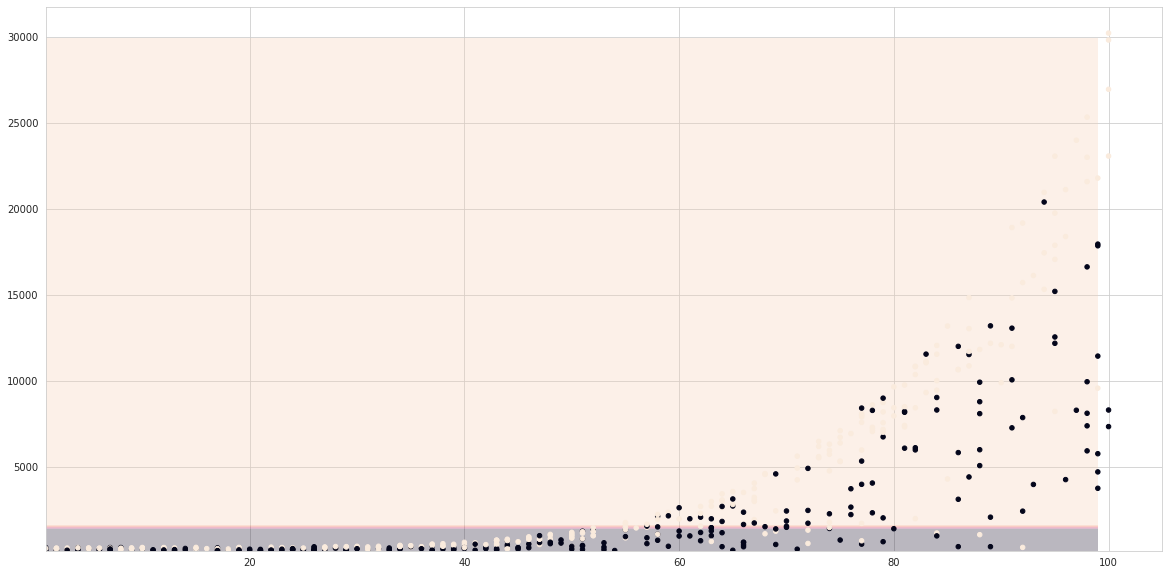

In [ ]:
x_min = teste_x.tempo_estimado.min()
x_max = teste_x.tempo_estimado.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(teste_x.tempo_estimado, teste_x.preco, c=teste_y, s=20)

# DECISION BOUNDARY

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


In [ ]:
treino_x

array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

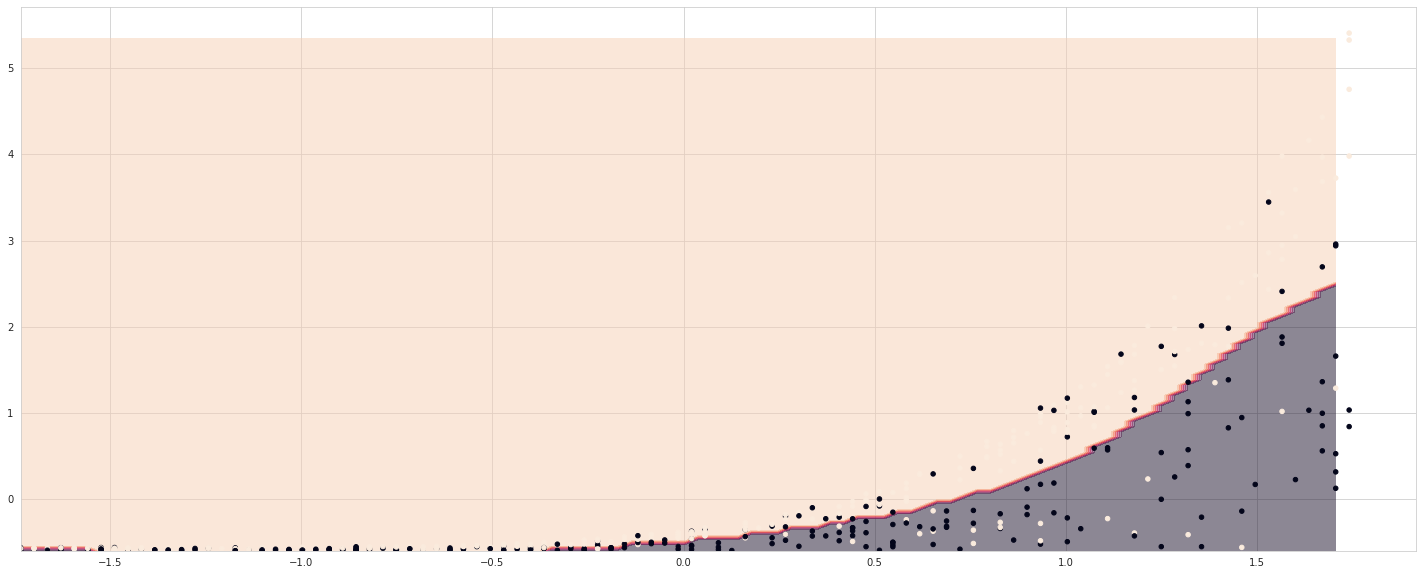

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.figure(figsize = (25,10))
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(data_x, data_y, c=teste_y, s=20)

# DECISION BOUNDARY